
# **<div align="center"> Analysing popular repositories on GitHub  </div>**

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/Potential17/Potential17/master/github-logo-octocat-.gif" width="250" height="250">
</div>


#**Imporing Libraries**

In [486]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import ast

#**Exploratory data analysis (EDA)**
#**1. Understaing Dataset**
**1.1 Importing Data**

In [487]:
Github_df = pd.read_csv("/content/Github_data.csv")
Github_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [488]:
Github_df.tail()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
1495,295,95,sensor,react-native-sensor-manager,kprimice,199,53,7,19,5,0.0,[],Native sensors access for react-native,NaN,45,1,0,0,0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,296,96,sensor,weatherstation,androidthings,199,72,31,4,0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64,2,0,0,0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,297,97,sensor,OctoPrint-Enclosure,vitormhenrique,198,77,32,63,2,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415,3,0,0,38,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,298,98,sensor,SensorDashboard,pocmo,197,110,25,0,0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103,2,0,0,0,Apache-2.0,https://github.com/pocmo/SensorDashboard
1499,299,99,sensor,BME680_driver,BoschSensortec,197,61,44,2,0,NaN,[],BME680 sensor driver / API including example g...,https://community.bosch-sensortec.com/t5/Bosch...,28,1,0,0,11,BSD-3-Clause,https://github.com/BoschSensortec/BME680_driver


**1.2. Shape of dataset**

In [489]:
Github_df.shape

(1500, 21)

**1.3. Info()**

In [490]:
Github_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1500 non-null   int64  
 1   Unnamed: 0.1      1500 non-null   int64  
 2   topic             1500 non-null   object 
 3   name              1500 non-null   object 
 4   user              1500 non-null   object 
 5   star              1500 non-null   object 
 6   fork              1500 non-null   object 
 7   watch             1500 non-null   object 
 8   issue             1500 non-null   object 
 9   pull_requests     1500 non-null   object 
 10  projects          1313 non-null   float64
 11  topic_tag         1500 non-null   object 
 12  discription_text  1480 non-null   object 
 13  discription_url   669 non-null    object 
 14  commits           1500 non-null   object 
 15  branches          1500 non-null   object 
 16  packages          1500 non-null   int64  


**1.4. Dtype**

In [491]:
Github_df_max = Github_df['star'].str.contains('k').all()
Github_df_max

False

In [492]:
Github_df['star']=Github_df['star'].str.replace('k','').astype(float)

**1.5. Describe**

In [493]:
Github_df['star'].describe()

count    1500.000000
mean      125.963867
std       236.871510
min         1.000000
25%         2.800000
50%        13.100000
75%       108.000000
max       996.000000
Name: star, dtype: float64

**1.6. Converting number with comma numerical.**

In [494]:
Numerical_columns = ["star","fork","watch","issue","pull_requests","projects","commits","branches","packages","releases","contributers"]
Github_df.at[700, 'issue'] = str(5000)

In [495]:
Github_df["issue"] = Github_df["issue"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["pull_requests"] = Github_df["pull_requests"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["commits"] = Github_df["commits"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["branches"] = Github_df["branches"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["contributers"] = Github_df["contributers"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)

**Column Star, Fork, Watch conatains number like(1.2K) format is convert into (1200) format.**


In [496]:
Github_df['fork'] = Github_df['fork'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
Github_df['watch'] = Github_df['watch'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)

Github_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9,18100,2100,2940.0,87.0,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,5342.0,6.0,0,0,49.0,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3,19600,2200,1505.0,764.0,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,25405.0,21.0,0,0,108.0,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1,9900,1500,65.0,67.0,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234.0,5.0,0,0,0.0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21.0,6600,1400,127.0,38.0,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,1079.0,3.0,0,0,0.0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4,8200,1500,7.0,0.0,0.0,[],Cheat Sheets,NaN,363.0,3.0,0,0,0.0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [497]:
Github_df.tail()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
1495,295,95,sensor,react-native-sensor-manager,kprimice,199.0,53,7,19.0,5.0,0.0,[],Native sensors access for react-native,NaN,45.0,1.0,0,0,0.0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,296,96,sensor,weatherstation,androidthings,199.0,72,31,4.0,0.0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64.0,2.0,0,0,0.0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,297,97,sensor,OctoPrint-Enclosure,vitormhenrique,198.0,77,32,63.0,2.0,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415.0,3.0,0,0,38.0,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,298,98,sensor,SensorDashboard,pocmo,197.0,110,25,0.0,0.0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103.0,2.0,0,0,0.0,Apache-2.0,https://github.com/pocmo/SensorDashboard
1499,299,99,sensor,BME680_driver,BoschSensortec,197.0,61,44,2.0,0.0,NaN,[],BME680 sensor driver / API including example g...,https://community.bosch-sensortec.com/t5/Bosch...,28.0,1.0,0,0,11.0,BSD-3-Clause,https://github.com/BoschSensortec/BME680_driver


**1.7. Handling Missing Values**

In [498]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [499]:
Github_df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
topic                 0
name                  0
user                  0
star                  0
fork                  0
watch                 0
issue                 0
pull_requests         0
projects            187
topic_tag             0
discription_text     20
discription_url     831
commits               0
branches              0
packages              0
releases              0
contributers          0
License               0
url                   0
dtype: int64

**Visualizing the null values for each attribute**

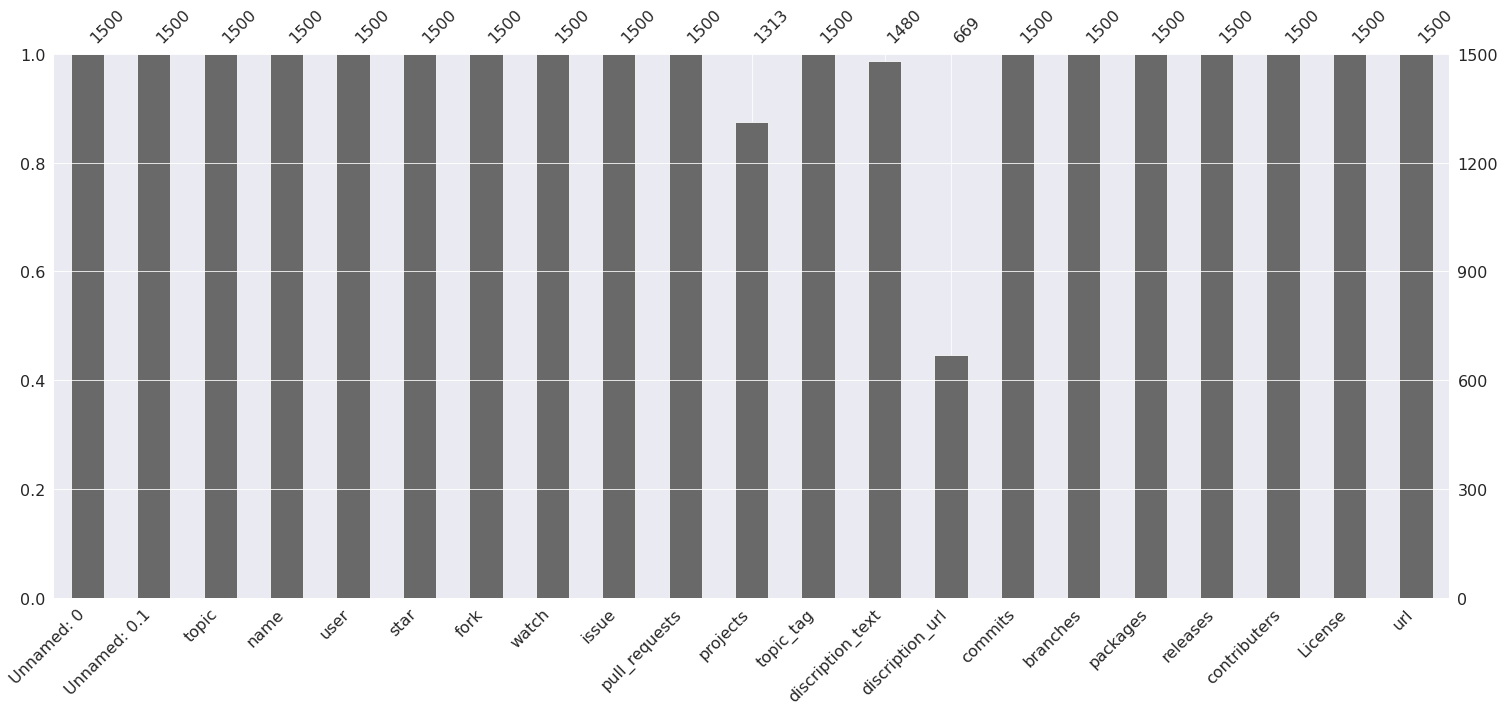

In [500]:
import missingno as msno

msno.bar(Github_df)
plt.show()


**1.8. filling a null values using fillna()**

**ffill means forwadrd fill (non-null values forward)**

In [501]:
Github_df["projects"].fillna(method='ffill', inplace = True)
Github_df["discription_url"].fillna(method='ffill', inplace = True)
Github_df["discription_text"].fillna(method='ffill', inplace = True)

In [502]:
#Checking for any null values 
Github_df.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
topic               0
name                0
user                0
star                0
fork                0
watch               0
issue               0
pull_requests       0
projects            0
topic_tag           0
discription_text    0
discription_url     0
commits             0
branches            0
packages            0
releases            0
contributers        0
License             0
url                 0
dtype: int64

**Processing on column topic_tag**

In [503]:
unique_tags = []
Github_df['topic_tag'].apply(lambda x: unique_tags.append(ast.literal_eval(x)))

all_tag = np.array([item for sublist in unique_tags for item in sublist])
unique, counts = np.unique(all_tag, return_counts=True)
print("Total number of tags in 1500 repository : ",len(all_tag))
print("Total number of unique tags in 1500 repository : ",len(unique))

tag_df = pd.DataFrame({"unique":unique,"counts":counts})
tag_df = tag_df.sort_values(['counts'],ascending=[False])

Total number of tags in 1500 repository :  8729
Total number of unique tags in 1500 repository :  3288


In [504]:
fig = px.bar(tag_df[:100],x="unique",y="counts",color='counts')
fig.show()

#**2. Repository Distributions Analysis**
**Analysis of repositories based on popularity as:**

**Star** - When a user likes your repo or they want to show some appreciation, they Star it.

**Watch** - When a user wants to be notified of all the activities in a repo, then they Watch it.

**Fork** - When a user wants a copy of the repo or make any contributions, they tend to Fork it.


**2.1. Topic wise project distribution.**

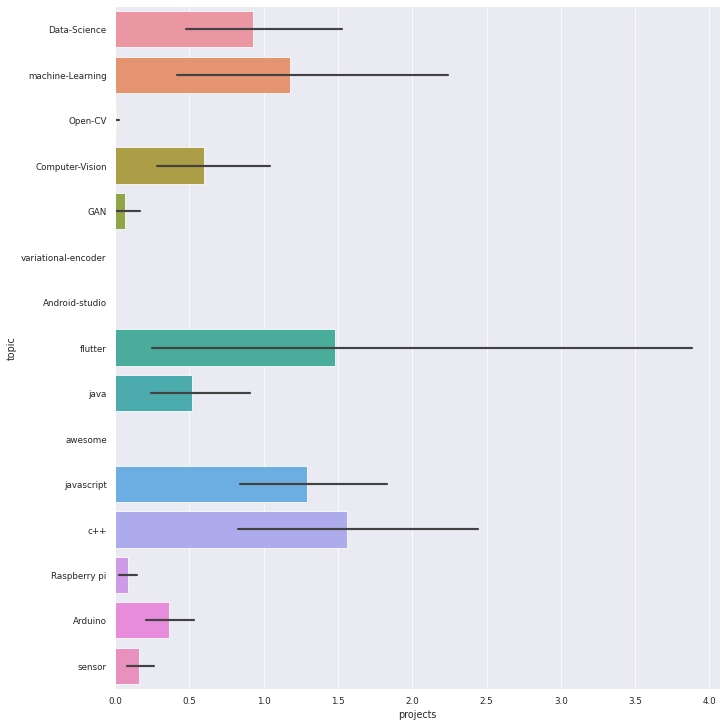

In [505]:
X = sns.catplot(x = "projects", y="topic", data = Github_df, height=10, kind="bar")
X.set_xlabels("projects")
X.set_ylabels("topic")
X.set_titles("Topicwise Projects")

**2.2. Repository Fork distribution:**

In [506]:
Github_df['fork'] = Github_df['fork'].astype(float)
fork_topicwise = Github_df.groupby('topic').sum()['fork']
fig = px.bar(fork_topicwise, x = fork_topicwise.index, y = "fork", color = fork_topicwise.index)
fig.show()

**We can see above Android-studio, Open-CV, sensor & Raspberry pi tags have  minimum or less forks.**

**2.3 Repository star distribution :**

In [507]:
Github_df['star'] = Github_df['star'].astype(float)
star_topicwise = Github_df.groupby('topic').sum()['star']
fig = px.bar(star_topicwise,x=star_topicwise.index,y="star",color=star_topicwise.index)
fig.show()

We can see here Arduino, Raspberry pi & sensor topic has most stared repository (total 30k+).

Also we know that machine-learning is most usable tags rather then machine-learning repository are not stared as much as java-script and java.

Data-Science, Computer-Vision, awesome, machine-Learning are those topics which accumulated sum are very low.

Data-science,computer-vision is most hot topic these days but data-science repositerys are not as much stared compared to other topics.

**2.4 Repository watch distribution:**



In [508]:
Github_df['watch'] = Github_df['watch'].astype(float)
watch_topicwise = Github_df.groupby('topic').sum()['watch']
fig = px.bar(watch_topicwise,x = watch_topicwise.index, y ="watch", color = watch_topicwise.index)
fig.show()

**We can see same similarity in topic-wise here like star and fork.**


**2.5 Issue Distribution**

In [509]:
Github_df['issue'] = Github_df['issue']
issue_topicwise = Github_df.groupby('topic').sum()['issue']
fig = px.pie(issue_topicwise, values ='issue', names = issue_topicwise.index, title ='Issue Distribution topic wise')
fig.show()

Javascript has most of the issues with 27% as compare to others tags.

**2.6 Commit Distribution :**


In [510]:
commit_topicwise = Github_df.groupby('topic').sum()['commits']
fig = px.pie(commit_topicwise, values ='commits', names = commit_topicwise.index, title ='Commit Distribution topic wise')
fig.show()

Defenetly Raspberry-pi topic have less star and forks but it wins in commits with almost 24%.

**2.7 Pull requests Distribution :**

In [511]:
Github_df['pull_requests'] = Github_df['pull_requests'].astype(float)
pull_req_topicwise = Github_df.groupby('topic').sum()['pull_requests']
fig = px.pie(pull_req_topicwise, values ='pull_requests', names = pull_req_topicwise.index, title ='Pull requests Distribution topic wise')
fig.show()

**Here javascript has more pull requests with 25% of over all chart, this means that users are much more interste in javascript as compare to other programming tags. 
After that users make requests on machine larning with 22% of a chart.**


**2.8 Contributors Distribution :**

In [512]:
contributers_topicwise = Github_df.groupby('topic').sum()['contributers']
fig = go.Figure(data=[go.Pie(labels=contributers_topicwise.index, values=contributers_topicwise.values, hole=.3)])
fig.show()

**Java-Script again win the game Data-Science and c++ topics are came forward. they are not at 2nd and 3rd place in star and fork repository.**

**2.9 License distribution :**

In [513]:
License_distribution = Github_df["License"].apply(lambda x: x if'\n' not in x else None).value_counts()
fig = px.bar(y = License_distribution.values, x = License_distribution.index)
fig.show()

#**3. Correlations**

**3.1. All numeric columns correlation:**


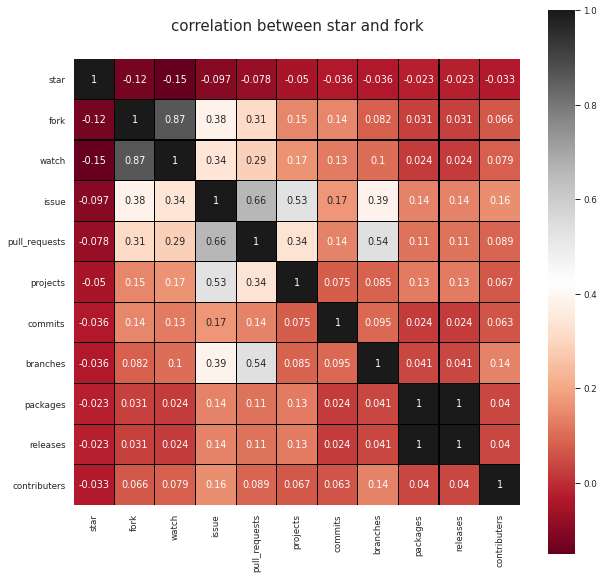

In [514]:
Numerical_columns = ["star","fork","watch","issue","pull_requests","projects","commits","branches","packages","releases","contributers"]
plt.figure(figsize=(10,10))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_df[Numerical_columns].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap='RdGy', linecolor='black', annot=True)

**There are many columns are not correlated.**

**3.2 Relationship between Star, Fork and Watch**

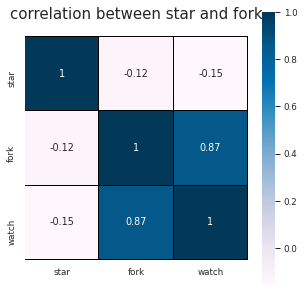

In [515]:
colormap = plt.cm.magma
plt.figure(figsize=(5,5))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_df[['star','fork','watch']].corr(),linewidths=0.1,vmax=1.0, square=True, cmap='PuBu', linecolor='black', annot=True)


star and watch are more correlatd (0.9)
star and fork is less correlated compare to other two,

**(Star & watch) > (Fork & watch) > (star > fork)**


**3.3 Correlation between the contribution columns**

In [516]:
corr_col_df = Github_df.dropna(axis=0, subset = ['issue', 'pull_requests', 'commits', 'branches', 'contributers'])[['issue','pull_requests','commits', 'branches', 'contributers']]
corr_col_df.corr

<bound method DataFrame.corr of        issue  pull_requests  commits  branches  contributers
0     2940.0           87.0   5342.0       6.0          49.0
1     1505.0          764.0  25405.0      21.0         108.0
2       65.0           67.0    234.0       5.0           0.0
3      127.0           38.0   1079.0       3.0           0.0
4        7.0            0.0    363.0       3.0           0.0
...      ...            ...      ...       ...           ...
1495    19.0            5.0     45.0       1.0           0.0
1496     4.0            0.0     64.0       2.0           0.0
1497    63.0            2.0    415.0       3.0          38.0
1498     0.0            0.0    103.0       2.0           0.0
1499     2.0            0.0     28.0       1.0          11.0

[1500 rows x 5 columns]>

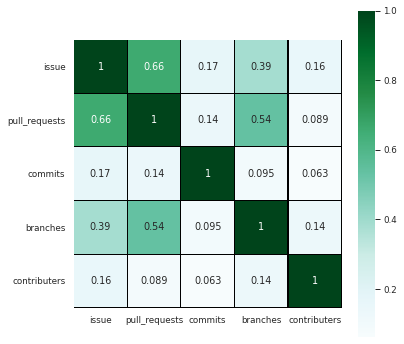

In [517]:
colormap = plt.cm.magma
plt.figure(figsize=(6,6))

sns.heatmap(corr_col_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='black', annot=True, cmap='BuGn');


Number of Commits is not dependent on either issue, pull requests or contributors. There is a Moderate Positive Relationship between Issues and Pull Requests.

#**4. Top 10 Repository Analysis Topicwiseb:**


**4.1 Stars of top 10 repositories**

In [518]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["star"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Java-script repository havs more stars then other repository in tpo 10 repositories.**

**4.2 Fork**


In [519]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["fork"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Machine-learning repositories are more forked then java-scriped repositories rether then java-script repositories are more stared.**


**3.3 Watch**

In [520]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["watch"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**4.4 Similarlly checking for contributors**

In [521]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["contributers"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Here we can see some different senerio
more stared repositories have less contributers**

**Inference :**

Among the top 10 most starred, watched, and forked repositories, Javascript is the most watched as well as forked repository. If a user is watching a repository, then they are mostly likely to fork it.

Microsoft and Google tend to be users with more popular repositories.

There is no actual relatonship between contribution activities (Issues, Pull requests, Commits).

Most used tags are Machine Learning, Python,JavaScript, Java.
